## Python Exercise 4 - 6

**Ingrid Gustavsen**

Deadline: **30/03**

### Exercise 4: The Bragg_Williams approximation

**TASK 1 - Finding the exact density of states**

- density_of_states.py and the density of states pngs
- The variance decreases as the system size increases. This is because the number of microstates increases as the system size increases.
- The program uses .. seconds to find all possible configurations for a system with 24 particles. 
- The multiplication of the number of microstates increases exponentially with the system size.
- This is why it is not possible to use this method on larger systems.

In [8]:
import numpy as np
from sympy import plot
from sympy.utilities.iterables import multiset_permutations
import matplotlib.pyplot as plt
import pickle
import seaborn as sns
import time

In [9]:
def get_lattice_shape(n): 
    """
    Determines the lattice shapes that will be used in this exercise, given n particles.
    """
    shapes = {4:(2,2), 6:(2,3), 8:(2,4), 12:(3,4), 16:(4,4), 20:(5,4), 24:(6,4)}
    return shapes[n]

In [10]:
def count_AB(lattice): 
    """
    Returns the number of AB-interactions, n_AB, for a provided lattice.
    Uses periodic boundary conditions.
    """
    n_AB = 0

    for coord, particle in np.ndenumerate(lattice): # coord is the coordinate, particle is the value at that coordinate, ndenumerate gives both
    
        if particle == 'A': #Prevents double counting
            # loop over the number of possible neighbours
            for incr in [(1,0),(0,-1),(-1,0),(0,1)]: # neighbour increments
                # The modulo operation ensures that periodic boundary conditions are employed
                # neighbour needs to be a tuple
                neighbour = np.array(coord) + np.array(incr) #add the coordinate to the increment
                neighbour = tuple(np.mod(neighbour, get_lattice_shape(lattice.size))) # ADD your code
                if lattice[neighbour] == 'B': #Checks if AB-interaction
                    n_AB += 1 
    return n_AB

In [11]:
def create_arrays_and_count(n):  #takes the number of particles as input
    """
    Given the number of molecules/lattice points, n, and returns a list with the number of AB interactions for all microstates, m_AB.
    A condition is that the number of A and B molecules is equal.
    """
    m_AB = [] # List to store the number of AB interactions for each microstate
    for config in multiset_permutations(int(n/2)*'AB'): 
        lattice = np.reshape(np.array(config), get_lattice_shape(n)) # Here, convert config to a numpy array and convert to a lattice (using np.reshape and lattice_shape above) 
        m_AB.append(count_AB(lattice)) # Then count the number of AB interactions using the function count_A
    return m_AB

In [12]:
for i in [4, 6, 8, 12, 16, 20, 24]: # The system sizes, shorten the list while testing 
    
    start = time.time() #Starts timer
    m_AB = create_arrays_and_count(i)
    end = time.time()
    print('Time elapsed for %i particles: %6.4f seconds' % (i, end-start))

    macrostates = sorted(list(set(m_AB))) # Sorts the macrostates list in ascending order 
    degeneracies = [m_AB.count(macrostate) for macrostate in macrostates] # Counts the number of times a certain number of bonds appear in m_AB 
    #Plots bar chart
    y_pos = np.arange(len(macrostates))
    print(y_pos)

    plt.figure(figsize=(10, 6))
    sns.barplot(x=y_pos, y=degeneracies) #plt.bar(y_pos, degeneracies)
    plt.title('Density of states for %i particles' % i)
    plt.xlabel("number of interactions AB", rotation=0)
    plt.ylabel("number of microstates")
    plt.xticks(y_pos, macrostates, fontsize=7, rotation=30)
    plt.savefig('density_of_states' + str(i))
    plt.clf()
    plt.show()
    #Calculates the variance of the microstate list. The variance decreases as system size increases because the system becomes more ordered.
    normalization_factor = max(m_AB) # The interaction energies are normalized
    normalized_mAB = [round(norm/normalization_factor, 2) for norm in m_AB] #Performs normalization
    print('%i particles:\nVariance: %6.4f\n' % (i, np.var(normalized_mAB))) #Prints variance

with open('m_AB.pkl', 'wb') as f: #Save microstate list along with system size for i = i_max (24 in this case)
    pickle.dump([m_AB,i], f)

Time elapsed for 4 particles: 0.0005 seconds
[0 1]
4 particles:
Variance: 0.0556

Time elapsed for 6 particles: 0.0030 seconds
[0 1]
6 particles:
Variance: 0.0336

Time elapsed for 8 particles: 0.0111 seconds
[0 1 2 3 4]
8 particles:
Variance: 0.0198

Time elapsed for 12 particles: 0.1919 seconds
[0 1 2 3 4 5 6]
12 particles:
Variance: 0.0116

Time elapsed for 16 particles: 3.7384 seconds
[0 1 2 3 4 5 6 7 8 9]
16 particles:
Variance: 0.0063

Time elapsed for 20 particles: 61.5166 seconds
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13]
20 particles:
Variance: 0.0068

Time elapsed for 24 particles: 1066.8635 seconds
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17]
24 particles:
Variance: 0.0045



<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

**TASK 2 - Determine the equilibrium degree of mixing**

We define the degree of mixing as the number of AB-interactions. To find the equilibrium degree, plot the
Helmholtz free energy in eq. 2 as a function of Ui for varying values of T ranging from 1-10. Consider only
systems with 24 particles. 

- show helmholtz_free_energy.png
- As the temperature increases, the equilibrium degree of mixing decreases.
- What is the physical explanation?


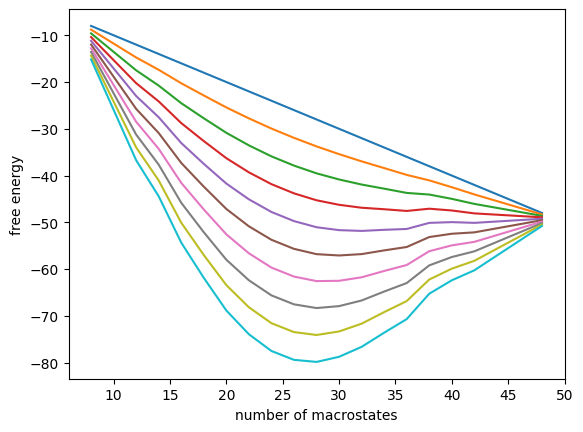

In [36]:
import numpy as np
from math import factorial, sqrt, exp, log
import matplotlib.pyplot as plt
import pickle

def calculate_F(m_AB):
    """
    Plots the Helmholtz free energy as a function of the energy for different temperatures.
    Given is a list of microstates, m_AB
    """
    macrostates = sorted(list(set(m_AB))) # Get macrosteps. Sorts list in ascending order
    degeneracies = [m_AB.count(macrostate) for macrostate in macrostates]
    temperatures = np.linspace(0,4,10) # the temperature range 
    for temp in temperatures:
        # Calculate a list with free energies. Use list comprehension. Hint: use zip(macrostates, degeneracies) as iterator
        free_energies =  []

        for m, w in zip(macrostates, degeneracies):
            free_energies.append(-m - temp*log(w)) # W = microstates * degeneracies. U = -m, m = 24. T = temp. F = U - T*ln(W)
        
        plt.plot(macrostates, free_energies)
        plt.xlabel("number of macrostates", rotation=0)
        plt.ylabel("free energy")
    plt.savefig('helmholtz_free_energy') #Saves plot as Helmholtz_free_energy.png
    plt.show()
    plt.close()

with open('m_AB.pkl', 'rb') as f: # Loads microstate list
    m_AB = pickle.load(f)[0]
calculate_F(m_AB)


**TASK 3 - Comparing the exact and approximate partition functions**

- Q: Partition function of temperature
- The approximation is not very good at low temperatures, because the multilplicity is very small
- As the temperature increases, the partition function increases. The exact partition function increases faster than the approximate partition function. The ratio of the exact and approximate partition function approaches 1 as the temperature increases.

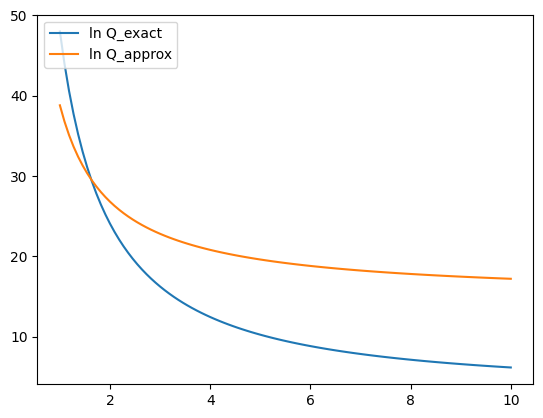

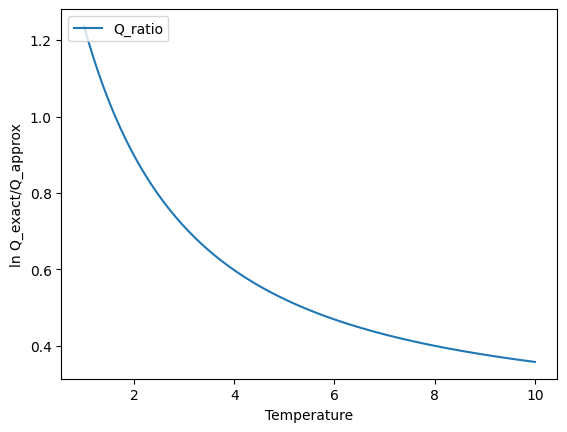

In [37]:
import numpy as np
from math import factorial, sqrt, exp, log
import sympy as sym
from sympy import plot
import matplotlib.pyplot as plt
import pickle

def calculate_Q_exact(m_AB, temp_inv) -> float: #returns float
    """
    Calculates the partition function as a sum of a list with Boltzmann factors.
    Given is a list with AB-bonds, m_AB, providing the energy (a minus sign difference)
    and the inverse of the temperature, temp_inv. The Boltzmann constant is here set to 1.
    """

    macrostates = sorted(list(set(m_AB))) # Get macrosteps. Sorts list in ascending order

    v: list = [exp(N*temp_inv) for N in macrostates]
    return sum(v)

def calculate_Q_approx(n, temp):
    """
    Calculates the partition function using the Bragg-Williams approximation
    Gives the number of particles, n, and the temperature, temp.
    Get the multiplicity (not from Stirling's approximation!)
    Returns ln Q
    """
    multiplicity = factorial(n)/(factorial(n//2))**2
    approx = n/temp + log(multiplicity)
    return approx


def partition_function_plot(m_AB, n) -> float:
    """
    Generates plots with the partition function.
    Given is a list with AB-bonds, m_AB, providing the energy (a minus sign difference)
    and the number of particles, n.
    """
    temps = np.linspace(1,10,100) #Temperature range to be plotted. High resolution
    Q_exact_list = []
    Q_approx_list = []
    Q_ratio = []
    #The for loop calculates and appends Q(T)
    for temp in temps:
        Q_exact = calculate_Q_exact(m_AB, 1.0/temp)
        Q_approx = calculate_Q_approx(n, temp)
        Q_exact_list.append(log(Q_exact))
        Q_approx_list.append(Q_approx)
        Q_ratio.append(log(Q_exact)/Q_approx)
    #Makes and saves plots
    plt.plot(temps, Q_exact_list)
    plt.plot(temps, Q_approx_list)
    plt.legend(['ln Q_exact', 'ln Q_approx'], loc='upper left')
    plt.savefig('partition_function')
    plt.show()
    plt.close()
    
    plt.plot(temps, Q_ratio)
    plt.xlabel("Temperature", rotation=0)
    plt.ylabel("ln Q_exact/Q_approx")
    plt.legend(['Q_ratio'], loc='upper left')
    plt.savefig('partition_function_ratio')
    plt.show()
    plt.close()

with open('m_AB.pkl', 'rb') as f: #Opens microstate list
    m_AB, n = pickle.load(f) #and creates variables m_AB (list) and N (system size)

partition_function_plot(m_AB, n)


### Exercise 5: Kinetic Monte Carlo simulations

**TASK 1: Using KMC to study the time evolution of a chemical reaction**

- Start with NA = NB = 1000 and NC = 0. Let this simulation run for 10000 steps. Can you identify, just by looking at the plot output, at what time the system reached equilibrium? Yes
- Run the program again, but with different values for NA, NB, and NC . Let NA ̸= NB. Run these simulations until equilibrium is reached, instead of using a given number of steps. What did you use as an equilibrium condition? Why is this valid? Set a tolerance to the equilibrium. Is valid because equilibrium is reached.
- Lastly, change the parameter kf and kr relative to each other. How does this effect the result (refer to the relation between equilibrium constant and rate constants in eq. 19.5 in Dill)? Does not effect the result



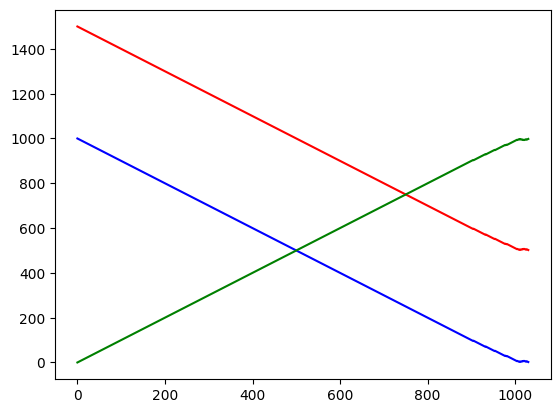

In [38]:
from random import uniform #will be used to pick random numbers between 0 and 1
from random import uniform #will be used to pick random numbers between 0 and 1
from math import log
from sympy import plot
import matplotlib.pyplot as plt #Will be used to create the relevant plots

#Part 1
n_a = 1.5e3 #Number of particles of type A
n_b = 1e3 #Number of particles of type B
n_c = 0 #Number of particles of type C

k_f = 0.05 #Kinetic forward constant
k_r = 0.05 #Kinetic reverse constant

def probability_forward(k_f, k_r, n_a, n_b, n_c): 
    """
    Calculates the probability of a forward transition. The reverse probability is 1 - forward.
    """
    r_f = k_f * n_a * n_b #Forward rate. n = c, V = 1
    r_r = k_r * n_c #Reverse rate

    return r_f / (r_f + r_r) #Probability of forward transition

#Part 2
num_trans = 1e4 #Sets up transition counter
equilibrium = False #Sets up equilibrium check
n_a_time = [n_a] #Inititates a list with number of A particles at each time step; for plotting
n_b_time = [n_b] #Inititates a list with number of B particles at each time step; for plotting
n_c_time = [n_c] #Inititates a list with number of C particles at each time step; for plotting
time_step = [ 0 ] #Sets up a list with the time passed after each transition; for plotting
while not equilibrium:
    #Use uniform(0,1) (generates random number) to select either forward or reverse reaction
    if uniform(0, 1) < probability_forward (k_f, k_r, n_a, n_b, n_c): #Check probability, 
    #Use incr = ... int(uniform(0,1)) ... to get an increment as +1 or -1 for updating the number of A, B and C particles
    #Update the number of particles for A, B and C
    # Forward reaction: A + B --> C 
        n_a -= 1
        n_b -= 1
        n_c += 1
    else:
    # Reverse reaction: C --> A + B
        n_a += 1
        n_b += 1
        n_c -= 1
    
    #Update the lists for plotting.
    n_a_time.append(n_a)
    n_b_time.append(n_b)
    n_c_time.append(n_c)
    time_step.append(time_step[-1] + 1) #[-1] is the last element in the list. +1 is the time step. Store the time_step as variable

    #Check the equilibrium condition to see if it has been reached

    if abs(k_f/k_r - n_c/(n_a*n_b)) < 0.1: #Give a tolerance of 0.1
        equilibrium = True
    
    if time_step[-1] > 1e6: #If the equilibrium is not reached after 1e7 time steps, break the loop
        print("Equilibrium not reached")
        break

#Part 3
#Show plot of number of each particle as a function of time. plt.plot(x-axis, y-axis, color)
plt.plot(time_step, n_a_time, 'r')
plt.plot(time_step, n_b_time, 'b')
plt.plot(time_step, n_c_time, 'g')
plt.show()

**TASK 2:  Studying the expansion of a 2-dimensional ideal gas on a surface**

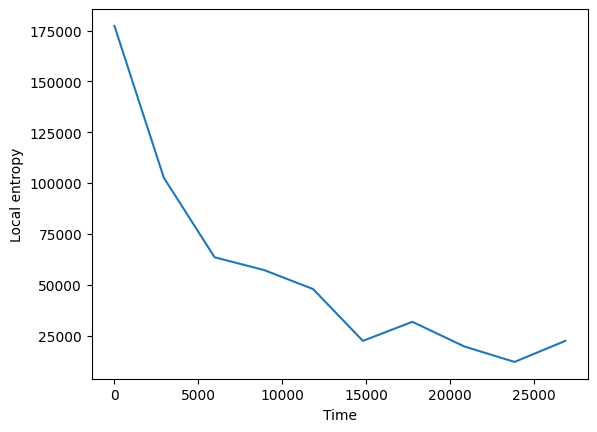

In [48]:
from numpy import zeros
from random import choice, uniform
import matplotlib.pyplot as plt
from math import log, factorial, lgamma
import imageio.v2 as imageio

row = 100 # row and col are the dimension of the lattice
col = 200 # number of particles
n = 50 # number of particles
num_steps = int(3e4) # number of simulation steps
dump_interval = int(num_steps/10) # should be around 1/10 of num_steps, a bad choice (too frequent) can make the calculation very slow 

def initialize(row, col, n):
    """
    Put all the particles on for example the left-hand side
    """

    assert n <= row*col #Make sure that the number of particles is not larger than the lattice size
    position_of_particles = []
    i, j = 0, 0 #indecies
    for p in range(n):
        if i >= row: #If the column is full, move to the next column
            i = 0
            j += 1
        position_of_particles.append((i,j))
        i += 1
    return position_of_particles

def possible_transitions(positions_of_particles):
    """
    Calculate the possible transitions from the positions
    """
    incr = [(0, 1), (0, -1), (1, 0), (-1, 0)] #Possible increments. [row, col]
    #Check if the transition is possible
    #If it is, add it to the list of possible transitions
    #If it is not, do nothing
    for position in positions_of_particles:
        potential_transitions = []
        for i in incr:
            new_position = (position[0] + i[0], position[1] + i[1])
            if (
                new_position[0] >= 0 and new_position[0] < row and
                new_position[1] >= 0 and new_position[1] < col and
                new_position not in positions_of_particles
            ):
                potential_transitions.append((new_position))

        yield (
            position,
            potential_transitions,
        )          

def perform_transition(positions_of_particles):
    """
    Choose a random transition and update the positions
    """
    for position, potential_transitions in possible_transitions(positions_of_particles): #Loop over all particles
        while potential_transitions:
            new_position = choice(potential_transitions) #Choose a random transition
            potential_transitions.remove(new_position)
            if new_position not in positions_of_particles: #Check if the new position is occupied
                positions_of_particles.remove(position)
                positions_of_particles.append(new_position)
                break
    return

def entropy_calc(positions_of_particles, n):
    """
    Use the min and max functions to obtain "lattice_spread" 
    """
    height = (
        max([p[0] for p in positions_of_particles])
        - min([p[0] for p in positions_of_particles])
        + 1
    )
    width = (
        max([p[1] for p in positions_of_particles])
        - min([p[1] for p in positions_of_particles])
        + 1
    )
    return lgamma(row * col + 1) - (lgamma(n + 1) + lgamma(width * height - n + 1))

def create_image(positions_of_particles, tr_num): 
    """
    tr_num is the actual simulation step  
    """
    #Create an array with a lattice and the occupied lattice points in positions_of_particles 

    current_state = zeros((row, col))
    for position in positions_of_particles:
        current_state[position] = 1
    imgplot = plt.imshow(current_state, cmap='binary')
    plt.savefig('lattice' + str(tr_num) + '.png')

#Main code starts
#Use the initialize function to create a list of all the particles positions
#Set up the list with possible transitions
#Set up lists for the time stamp and the local entropy that can be updated inside the loop

p_positions = initialize(row, col, n)
time_step = []
local_entropy = []
time = 0

for tr_num in range(num_steps): #tr_num is the actual simulation step
    perform_transition(p_positions)
    time -= log(uniform(0,1))
    if tr_num % dump_interval == 0 or tr_num == 0:
        create_image(p_positions, tr_num)
        local_entropy.append(entropy_calc(p_positions, n))
        time_step.append(time)

#The code below creates the plots the local entropy as a function of time.
plt.clf()
plt.plot(time_step, local_entropy)
plt.xlabel("Time")
plt.ylabel("Local entropy")
plt.show()

frames = []
base_path = "C:/Users/ingrid/vscode/Nano/TKJ-4215"

imageio.mimsave(base_path + "/animation.gif", frames, format='GIF', duration=1)



### Exercise 6:

**TASK 3: Argon Atoms**
- The potential between the two atoms will be zero at r = sigma
- The force is zero when the distance between the two particles is 2.15. we can check this by plugging in 2.15 into the force equation

Fr is:  -24/r**7 + 48/r**13
[-2**(1/6), 2**(1/6), -2**(1/6)/2 - 2**(1/6)*sqrt(3)*I/2, -2**(1/6)/2 + 2**(1/6)*sqrt(3)*I/2, 2**(1/6)/2 - 2**(1/6)*sqrt(3)*I/2, 2**(1/6)/2 + 2**(1/6)*sqrt(3)*I/2]


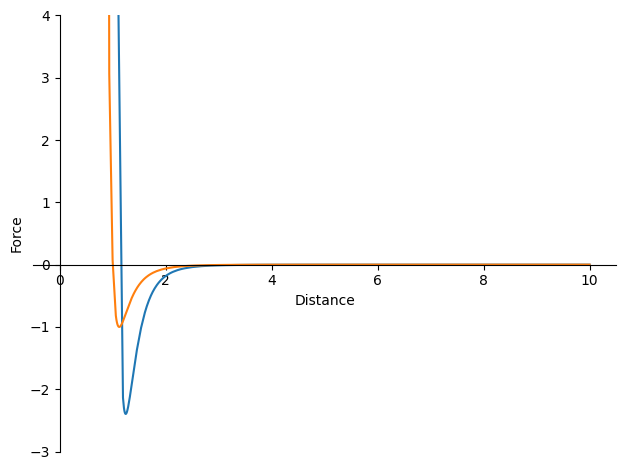

In [49]:
from sympy import diff, symbols, solve, plot

eps, sig, r = symbols('eps sig r')

#Removing # from eps and sig below will turn eps and sig into normal variables  of python symbols.
eps = 1
sig = 1

V = 4*eps*((sig/r)**12 - (sig/r)**6) #Input expression for the potential

#calculate Fr using diff()
# Recall that the force is minus the gradient of the potential energy

Fr = -diff(V, r) #Fr is the force. V is the potential energy

print("Fr is: ", Fr)
print(solve(Fr, r)) # to get where the force is zero

plot(Fr, V, (r, 0, 10), xlabel='Distance', ylabel='Force', axis_center=(0,0), ylim=(-3*eps,4*eps))

**TASK 4: Applying Lennard-Jones to a larger system**

In [50]:
from sympy import diff, symbols, sqrt
import numpy as np


#***************YOUR INPUT HERE*************#

x, y, z = symbols('x y z') #We define the symbols x, y and z

eps = 0.997 #kcal/mol
sig = 3.4 # Angstrom

r = sqrt(x**2 + y**2 + z**2) #We define the distance between the atoms

V = 4*eps*((sig/r)**12 - (sig/r)**6)
vdiff = [diff(V, v) for v in [x, y, z]] #List that stores the differentials of V (in task F)

#**************END YOUR INPUT HERE***********#

#Here we input the coordinates of the atoms. You can have as many atoms as you want, 
#and change the coordinates to whatever you like
atoms = np.array([[0.,0.,0.], [0.,0.,1.], [0.,1.,0.], [1.,0.,0.], [1.,1.,0.], [1.,0.,1.], [0.,1.,1.], [1.,1.,1.], [0.5, 0.5, 0.5]])

file = open("output.txt", "w") #We write the output to a textfile
file.write('    Atom 1    ' + '    Atom2   ' + '    Force(x-dir)   Force(y-dir)   Force(z-dir) ' + '\n')

for i in range(len(atoms)):
    for j in range(i):
        res = atoms[i] - atoms[j]
        Fxyz = [tv.subs([(x,res[0]), (y,res[1]),  (z,res[2])]) for tv in vdiff]
        print("Between", atoms[i], "and", atoms[j], "we have the forces", Fxyz)
        file.write(str(atoms[i]) + " " + str(atoms[j]))
        file.write( "%14.2f %14.2f %14.2f" % (Fxyz[0], Fxyz[1], Fxyz[2]) + '\n')
file.close()


Between [0. 0. 1.] and [0. 0. 0.] we have the forces [0, 0, -114167584.158751]
Between [0. 1. 0.] and [0. 0. 0.] we have the forces [0, -114167584.158751, 0]
Between [0. 1. 0.] and [0. 0. 1.] we have the forces [0, -889912.778111630, 889912.778111630]
Between [1. 0. 0.] and [0. 0. 0.] we have the forces [-114167584.158751, 0, 0]
Between [1. 0. 0.] and [0. 0. 1.] we have the forces [-889912.778111630, 0, 889912.778111630]
Between [1. 0. 0.] and [0. 1. 0.] we have the forces [-889912.778111630, 889912.778111630, 0]
Between [1. 1. 0.] and [0. 0. 0.] we have the forces [-889912.778111630, -889912.778111630, 0]
Between [1. 1. 0.] and [0. 0. 1.] we have the forces [-51763.3827512728, -51763.3827512728, 51763.3827512728]
Between [1. 1. 0.] and [0. 1. 0.] we have the forces [-114167584.158751, 0, 0]
Between [1. 1. 0.] and [1. 0. 0.] we have the forces [0, -114167584.158751, 0]
Between [1. 0. 1.] and [0. 0. 0.] we have the forces [-889912.778111630, 0, -889912.778111630]
Between [1. 0. 1.] and 